# TeamVoice를 분석해본다. (세 번째)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd

In [2]:
file1 = '../../nmb_data/teamvoice/clear/testvoice_F1(clear).wav'
file2 = '../../nmb_data/teamvoice/clear/testvoice_F1_high(clear).wav'
file3 = '../../nmb_data/teamvoice/clear/testvoice_M2(claer).wav' 

In [4]:
# load audio files with librosa
f1, sr = librosa.load(file1)
f1_high, _ = librosa.load(file2)
m2, _ = librosa.load(file3)

In [5]:
print(len(f1))

110250


# Spectral centroid with Librosa
- 주파수 내에 가장 에너지가 집중되어 있는 곳을 측정한다.
- (가장 큰 주파수를 기록하는 것 같다.)

In [6]:
FRAME_SIZE = 1024
HOP_LENGTH = 512

sc_f1 = librosa.feature.spectral_centroid(y=f1, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
sc_f1_high = librosa.feature.spectral_centroid(y=f1_high, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
sc_m2 = librosa.feature.spectral_centroid(y=m2, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

print(sc_f1.shape)

(216,)


216


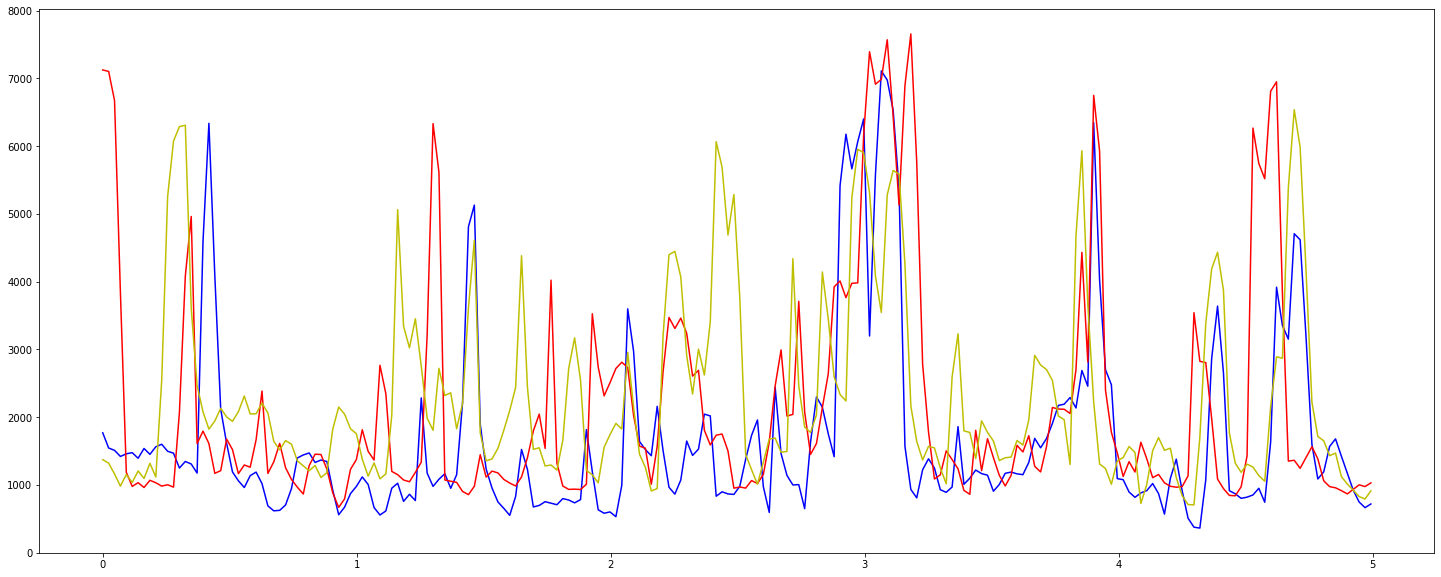

In [11]:
frames = range(len(sc_f1))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

print(len(t))


plt.figure(figsize=(25,10))

plt.plot(t, sc_f1, color='b')
plt.plot(t, sc_f1_high, color='r')
plt.plot(t, sc_m2, color='y')

plt.show()


가로축 : time    
세로축 : value of spectral centroid

------

# Spectral bandwidth with Librosa
- Spectral Centroid 에서부터 출발
- Centroid 값을 기준으로 spectral의 범위를 측정한다.
- spectral Centroid의 분산
- (Centroid를 중앙값이라고 했을 때, 이 중앙값을 기준으로 어느정도 값들이 떨어져 있는지를 나타내는 지표같다.)

In [12]:
ban_f1 = librosa.feature.spectral_bandwidth(y=f1, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
ban_f1_high = librosa.feature.spectral_bandwidth(y=f1_high, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
ban_m2 = librosa.feature.spectral_bandwidth(y=m2, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

print(ban_f1.shape)

(216,)


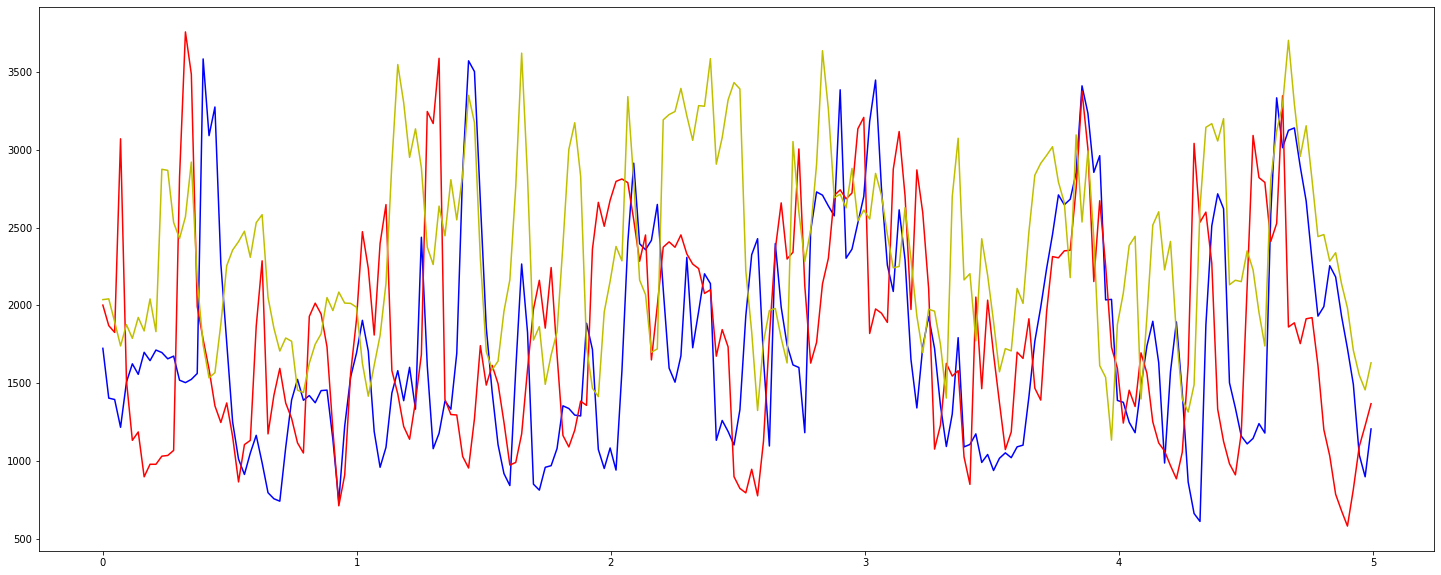

In [14]:
plt.figure(figsize=(25,10))

plt.plot(t, ban_f1, color='b')
plt.plot(t, ban_f1_high, color='r')
plt.plot(t, ban_m2, color='y')

plt.show()

가로축 : time    
세로축 : value of spectral bandwidth